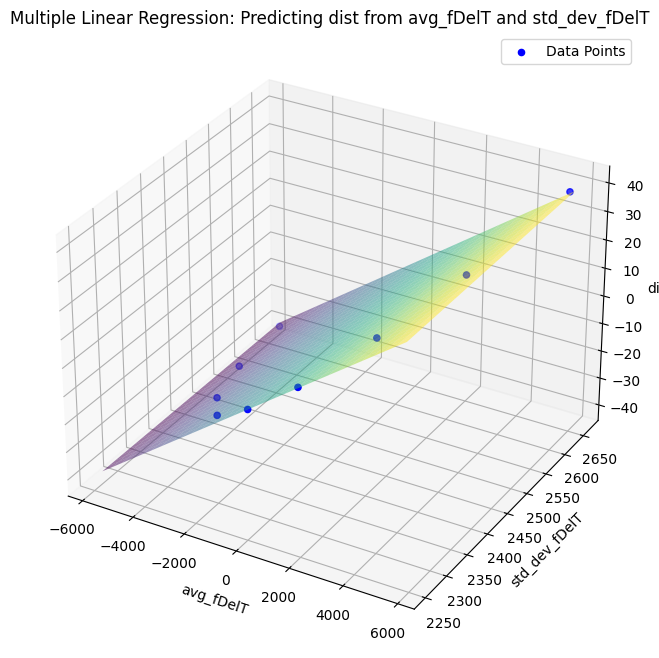

Mean Squared Error: 0.9487141126321235
Regression Equation: dist = 0.24 + 0.01 * avg_fDelT + -0.00 * std_dev_fDelT


In [3]:
import pandas as pd
import numpy as np
import glob
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

# List of CSV files
csv_files = [
    'Data_0.csv', 'Data_+10.csv', 'Data_+20.csv', 'Data_+30.csv', 'Data_+40.csv',
    'Data_-10.csv', 'Data_-20.csv', 'Data_-30.csv', 'Data_-40.csv'
]

# Initialize arrays to store data for multiple linear regression
avg_fDelT = []
std_dev_fDelT = []
dist_data = []

# Load data and populate arrays
for file in csv_files:
    dist = int(file.split('_')[-1].split('.')[0])  # Extract the 'dist' value from the file name
    data = pd.read_csv(file)
    
    avg_fDelT.append(data['corrected'].mean())
    std_dev_fDelT.append(data['corrected'].std())
    dist_data.append(dist)

# Convert arrays to numpy arrays
avg_fDelT = np.array(avg_fDelT).reshape(-1, 1)
std_dev_fDelT = np.array(std_dev_fDelT).reshape(-1, 1)
dist_data = np.array(dist_data)

# Create and fit the multiple linear regression model
X = np.hstack((avg_fDelT, std_dev_fDelT))
model_multi = LinearRegression()
model_multi.fit(X, dist_data)

# Generate data points for the regression plane
avg_fDelT_range = np.linspace(min(avg_fDelT), max(avg_fDelT), 30)
std_dev_fDelT_range = np.linspace(min(std_dev_fDelT), max(std_dev_fDelT), 30)
avg_fDelT_range, std_dev_fDelT_range = np.meshgrid(avg_fDelT_range, std_dev_fDelT_range)
dist_predicted = model_multi.predict(np.array([avg_fDelT_range.flatten(), std_dev_fDelT_range.flatten()]).T)

# Create a 3D scatter plot with the regression plane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(avg_fDelT, std_dev_fDelT, dist_data, color='blue', label='Data Points')
ax.plot_surface(avg_fDelT_range, std_dev_fDelT_range, dist_predicted.reshape(avg_fDelT_range.shape), alpha=0.5, cmap='viridis')
ax.set_title('Multiple Linear Regression: Predicting dist from avg_fDelT and std_dev_fDelT')
ax.set_xlabel('avg_fDelT')
ax.set_ylabel('std_dev_fDelT')
ax.set_zlabel('dist')
ax.legend()
plt.show()

# Calculate predictions using the multiple linear regression model
dist_predicted = model_multi.predict(X)

# Calculate Mean Squared Error
mse = mean_squared_error(dist_data, dist_predicted)

# Extract coefficients for the regression equation
coefficients = model_multi.coef_
intercept = model_multi.intercept_

# Construct the equation
equation = f"dist = {intercept:.2f} + {coefficients[0]:.2f} * avg_fDelT + {coefficients[1]:.2f} * std_dev_fDelT"

print("Mean Squared Error:", mse)
print("Regression Equation:", equation)


In [4]:
# List of CSV test files
test_csv_files = ['Data_+45.csv', 'Data_-45.csv']

# Initialize arrays to store data for prediction
test_avg_fDelT = []
test_std_dev_fDelT = []

# Load test data and populate arrays
for file in test_csv_files:
    data = pd.read_csv(file)
    
    avg_fDelT = data['corrected'].mean()
    std_dev_fDelT = data['corrected'].std()
    
    test_avg_fDelT.append(avg_fDelT)
    test_std_dev_fDelT.append(std_dev_fDelT)

# Convert arrays to numpy arrays
test_avg_fDelT = np.array(test_avg_fDelT).reshape(-1, 1)
test_std_dev_fDelT = np.array(test_std_dev_fDelT).reshape(-1, 1)

# Predict 'dist' using the trained multiple linear regression model
test_X = np.hstack((test_avg_fDelT, test_std_dev_fDelT))
predicted_dist = model_multi.predict(test_X)

# Print the predicted 'dist' values for each test data point
for i, file in enumerate(test_csv_files):
    print(f"Test File: {file}, Predicted dist: {predicted_dist[i]:.2f}")


Test File: Data_+45.csv, Predicted dist: 41.34
Test File: Data_-45.csv, Predicted dist: -41.22


Equation: dist = -55.80 + 0.00 * avg_fDelT + 0.04 * std_dev_fDelT + -0.00 * (avg_fDelT)^2 + 0.00 * avg_fDelT * std_dev_fDelT + -0.00 * (std_dev_fDelT)^2


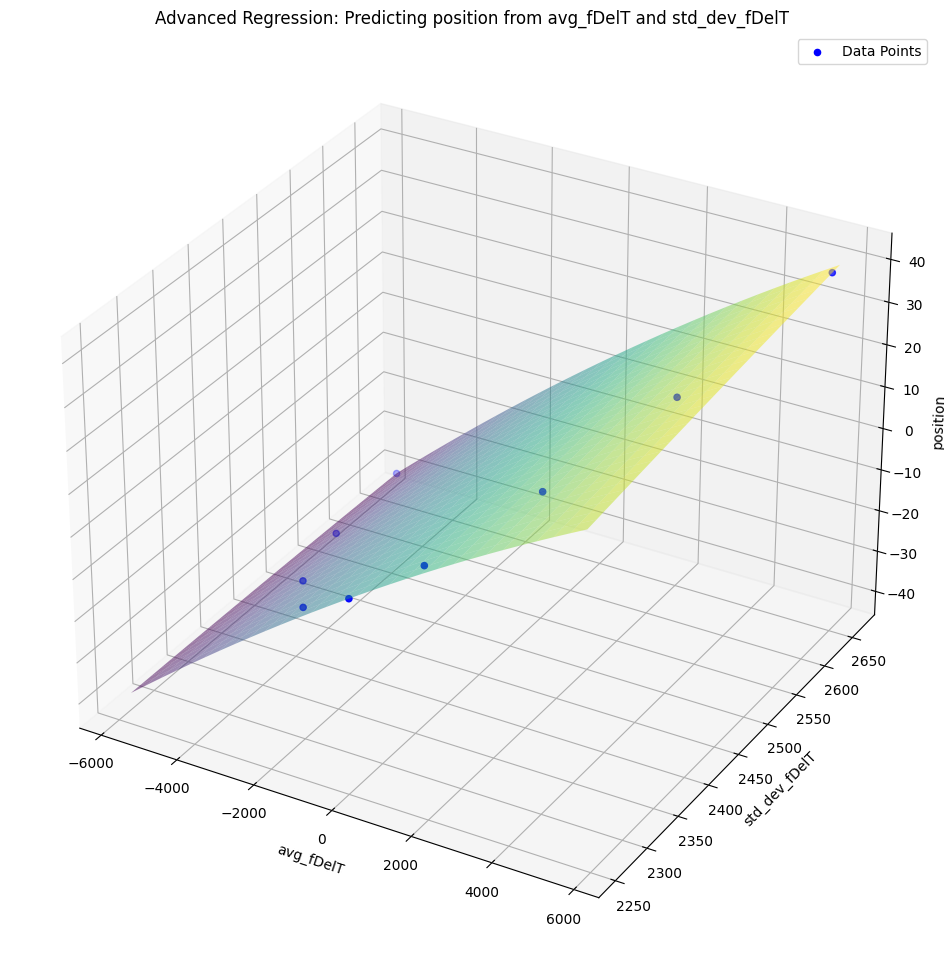

Mean Squared Error: 0.003999083152487563
Regression Equation: Equation: dist = -55.80 + 0.00 * avg_fDelT + 0.04 * std_dev_fDelT + -0.00 * (avg_fDelT)^2 + 0.00 * avg_fDelT * std_dev_fDelT + -0.00 * (std_dev_fDelT)^2


In [18]:
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# List of CSV files
csv_files = [
    'Data_0.csv', 'Data_+10.csv', 'Data_+20.csv', 'Data_+30.csv', 'Data_+40.csv',
    'Data_-10.csv', 'Data_-20.csv', 'Data_-30.csv', 'Data_-40.csv'
]

# Initialize arrays to store data for polynomial regression
avg_fDelT = []
std_dev_fDelT = []
dist_data = []

# Load data and populate arrays
for file in csv_files:
    dist = int(file.split('_')[-1].split('.')[0])  # Extract the 'dist' value from the file name
    data = pd.read_csv(file)
    
    avg_fDelT.append(data['corrected'].mean())
    std_dev_fDelT.append(data['corrected'].std())
    dist_data.append(dist)

# Convert arrays to numpy arrays
avg_fDelT = np.array(avg_fDelT).reshape(-1, 1)
std_dev_fDelT = np.array(std_dev_fDelT).reshape(-1, 1)
dist_data = np.array(dist_data)

# Apply polynomial features
poly_features = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_poly = poly_features.fit_transform(np.hstack((avg_fDelT, std_dev_fDelT)))

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, dist_data)

# Get the coefficients of the polynomial regression model
coefficients = poly_model.coef_
intercept = poly_model.intercept_

# Calculate predictions using the polynomial regression model
dist_predicted = poly_model.predict(X_poly)

# Calculate Mean Squared Error
mse = mean_squared_error(dist_data, dist_predicted)

# Print the equation of the polynomial regression model
equation = f'Equation: dist = {intercept:.2f} + {coefficients[1]:.2f} * avg_fDelT + {coefficients[2]:.2f} * std_dev_fDelT + {coefficients[3]:.2f} * (avg_fDelT)^2 + {coefficients[4]:.2f} * avg_fDelT * std_dev_fDelT + {coefficients[5]:.2f} * (std_dev_fDelT)^2'
print(equation)

# Generate data points for the regression surface
avg_fDelT_range = np.linspace(min(avg_fDelT), max(avg_fDelT), 30)
std_dev_fDelT_range = np.linspace(min(std_dev_fDelT), max(std_dev_fDelT), 30)
avg_fDelT_range, std_dev_fDelT_range = np.meshgrid(avg_fDelT_range, std_dev_fDelT_range)
X_range = np.array([avg_fDelT_range.flatten(), std_dev_fDelT_range.flatten()]).T
X_range_poly = poly_features.transform(X_range)
dist_predicted_range = poly_model.predict(X_range_poly)

# Create a 3D scatter plot with the regression surface
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(avg_fDelT, std_dev_fDelT, dist_data, color='blue', label='Data Points')
ax.plot_surface(avg_fDelT_range, std_dev_fDelT_range, dist_predicted_range.reshape(avg_fDelT_range.shape), alpha=0.5, cmap='viridis')
ax.set_title('Advanced Regression: Predicting position from avg_fDelT and std_dev_fDelT')
ax.set_xlabel('avg_fDelT')
ax.set_ylabel('std_dev_fDelT')
ax.set_zlabel('position')
ax.legend()
plt.show()

print("Mean Squared Error:", mse)
print("Regression Equation:", equation)


In [6]:
# List of CSV test files
test_csv_files = ['Data_+45.csv', 'Data_-45.csv']

# Initialize arrays to store data for prediction
test_avg_fDelT = []
test_std_dev_fDelT = []

# Load test data and populate arrays
for file in test_csv_files:
    data = pd.read_csv(file)
    
    avg_fDelT = data['corrected'].mean()
    std_dev_fDelT = data['corrected'].std()
    
    test_avg_fDelT.append(avg_fDelT)
    test_std_dev_fDelT.append(std_dev_fDelT)

# Convert arrays to numpy arrays
test_avg_fDelT = np.array(test_avg_fDelT).reshape(-1, 1)
test_std_dev_fDelT = np.array(test_std_dev_fDelT).reshape(-1, 1)

# Apply polynomial features to test data
test_X_poly = poly_features.transform(np.hstack((test_avg_fDelT, test_std_dev_fDelT)))

# Predict 'dist' using the trained polynomial regression model
predicted_dist = poly_model.predict(test_X_poly)

# Print the predicted 'dist' values for each test data point
for i, file in enumerate(test_csv_files):
    print(f"Test File: {file}, Predicted dist: {predicted_dist[i]:.2f}")


Test File: Data_+45.csv, Predicted dist: 45.04
Test File: Data_-45.csv, Predicted dist: -44.21


Mean Squared Error: 0.37591631086092636
Equation: dist = 12.82 + 0.01 * mode_fDelT + -0.01 * std_dev_fDelT


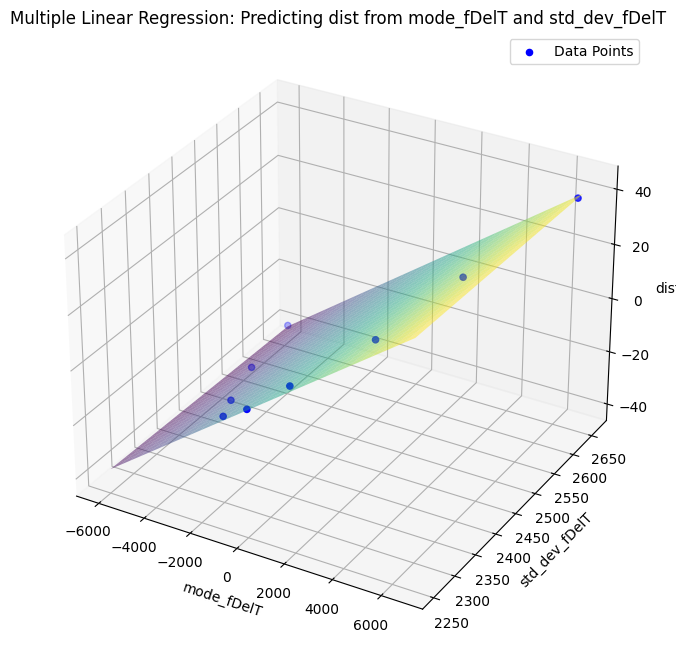

In [12]:
import pandas as pd
import numpy as np
import glob
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# List of CSV files
csv_files = [
    'Data_0.csv', 'Data_+10.csv', 'Data_+20.csv', 'Data_+30.csv', 'Data_+40.csv',
    'Data_-10.csv', 'Data_-20.csv', 'Data_-30.csv', 'Data_-40.csv'
]

# Initialize arrays to store data for multiple linear regression
mode_fDelT = []
std_dev_fDelT = []
dist_data = []

# Load data and populate arrays
for file in csv_files:
    dist = int(file.split('_')[-1].split('.')[0])  # Extract the 'dist' value from the file name
    data = pd.read_csv(file)
    
    mode_fDelT.append(data['corrected'].mode().iloc[0])  # Get the mode of the 'fDelT' column
    std_dev_fDelT.append(data['corrected'].std())
    dist_data.append(dist)

# Convert arrays to numpy arrays
mode_fDelT = np.array(mode_fDelT).reshape(-1, 1)
std_dev_fDelT = np.array(std_dev_fDelT).reshape(-1, 1)
dist_data = np.array(dist_data)

# Create and fit the multiple linear regression model
X_mode_stddev = np.hstack((mode_fDelT, std_dev_fDelT))
model_mode_stddev = LinearRegression()
model_mode_stddev.fit(X_mode_stddev, dist_data)

# Get the coefficients of the multiple linear regression model
coefficients = model_mode_stddev.coef_
intercept = model_mode_stddev.intercept_

# Calculate predictions using the multiple linear regression model
dist_predicted = model_mode_stddev.predict(X_mode_stddev)

# Calculate Mean Squared Error
mse = mean_squared_error(dist_data, dist_predicted)

# Print the equation of the multiple linear regression model
equation = f'Equation: dist = {intercept:.2f} + {coefficients[0]:.2f} * mode_fDelT + {coefficients[1]:.2f} * std_dev_fDelT'
print("Mean Squared Error:", mse)
print(equation)

# Create a scatter plot with the regression plane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mode_fDelT, std_dev_fDelT, dist_data, color='blue', label='Data Points')
ax.set_xlabel('mode_fDelT')
ax.set_ylabel('std_dev_fDelT')
ax.set_zlabel('dist')
ax.set_title('Multiple Linear Regression: Predicting dist from mode_fDelT and std_dev_fDelT')

# Generate data points for the regression plane
mode_fDelT_range = np.linspace(min(mode_fDelT), max(mode_fDelT), 30)
std_dev_fDelT_range = np.linspace(min(std_dev_fDelT), max(std_dev_fDelT), 30)
mode_fDelT_range, std_dev_fDelT_range = np.meshgrid(mode_fDelT_range, std_dev_fDelT_range)
X_range = np.array([mode_fDelT_range.flatten(), std_dev_fDelT_range.flatten()]).T
dist_predicted_range = model_mode_stddev.predict(X_range)

# Plot the regression plane
ax.plot_surface(mode_fDelT_range, std_dev_fDelT_range, dist_predicted_range.reshape(mode_fDelT_range.shape), alpha=0.5, cmap='viridis')
ax.legend()
plt.show()


In [13]:
# List of CSV test files
test_csv_files = ['Data_+45.csv', 'Data_-45.csv']

# Initialize arrays to store data for prediction
test_mode_fDelT = []
test_std_dev_fDelT = []

# Load test data and populate arrays
for file in test_csv_files:
    data = pd.read_csv(file)
    
    mode_fDelT = data['corrected'].mode().iloc[0]  # Get the mode of the 'fDelT' column
    std_dev_fDelT = data['corrected'].std()
    
    test_mode_fDelT.append(mode_fDelT)
    test_std_dev_fDelT.append(std_dev_fDelT)

# Convert arrays to numpy arrays
test_mode_fDelT = np.array(test_mode_fDelT).reshape(-1, 1)
test_std_dev_fDelT = np.array(test_std_dev_fDelT).reshape(-1, 1)

# Predict 'dist' using the trained multiple linear regression model
test_X = np.hstack((test_mode_fDelT, test_std_dev_fDelT))
predicted_dist = model_mode_stddev.predict(test_X)

# Print the predicted 'dist' values for each test data point
for i, file in enumerate(test_csv_files):
    print(f"Test File: {file}, Predicted dist: {predicted_dist[i]:.2f}")


Test File: Data_+45.csv, Predicted dist: 39.14
Test File: Data_-45.csv, Predicted dist: -44.72


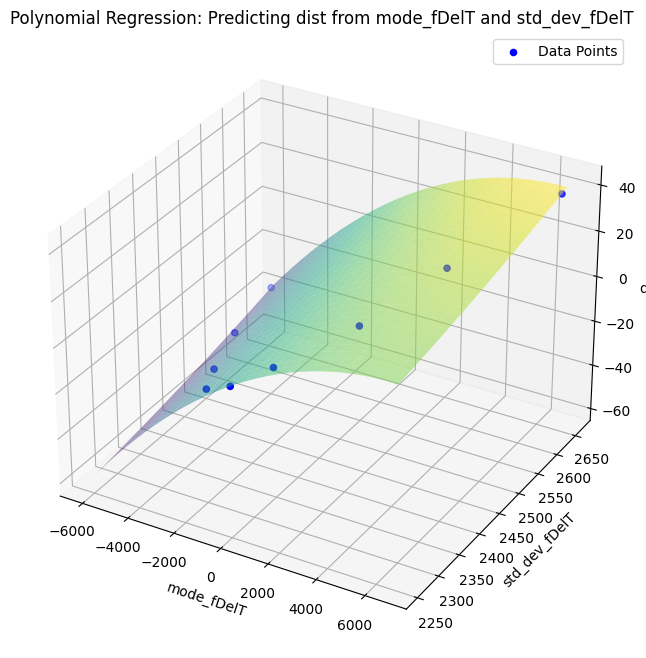

Mean Squared Error: 0.23106396840408022
Equation: dist = 86.42 + 0.01 * mode_fDelT + -0.11 * std_dev_fDelT + -0.00 * (mode_fDelT)^2 + 0.00 * mode_fDelT * std_dev_fDelT + 0.00 * (std_dev_fDelT)^2


In [14]:
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

# List of CSV files
csv_files = [
    'Data_0.csv', 'Data_+10.csv', 'Data_+20.csv', 'Data_+30.csv', 'Data_+40.csv',
    'Data_-10.csv', 'Data_-20.csv', 'Data_-30.csv', 'Data_-40.csv'
]

# Initialize arrays to store data for polynomial regression
mode_fDelT = []
std_dev_fDelT = []
dist_data = []

# Load data and populate arrays
for file in csv_files:
    dist = int(file.split('_')[-1].split('.')[0])  # Extract the 'dist' value from the file name
    data = pd.read_csv(file)
    
    mode_fDelT.append(data['corrected'].mode().iloc[0])  # Get the mode of the 'fDelT' column
    std_dev_fDelT.append(data['corrected'].std())
    dist_data.append(dist)

# Convert arrays to numpy arrays
mode_fDelT = np.array(mode_fDelT).reshape(-1, 1)
std_dev_fDelT = np.array(std_dev_fDelT).reshape(-1, 1)
dist_data = np.array(dist_data)

# Apply polynomial features
poly_features = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_poly = poly_features.fit_transform(np.hstack((mode_fDelT, std_dev_fDelT)))

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, dist_data)

# Generate data points for the regression surface
mode_fDelT_range = np.linspace(min(mode_fDelT), max(mode_fDelT), 30)
std_dev_fDelT_range = np.linspace(min(std_dev_fDelT), max(std_dev_fDelT), 30)
mode_fDelT_range, std_dev_fDelT_range = np.meshgrid(mode_fDelT_range, std_dev_fDelT_range)
X_range = np.array([mode_fDelT_range.flatten(), std_dev_fDelT_range.flatten()]).T
X_range_poly = poly_features.transform(X_range)
dist_predicted_range = poly_model.predict(X_range_poly)

# Create a 3D scatter plot with the regression surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mode_fDelT, std_dev_fDelT, dist_data, color='blue', label='Data Points')
ax.plot_surface(mode_fDelT_range, std_dev_fDelT_range, dist_predicted_range.reshape(mode_fDelT_range.shape), alpha=0.5, cmap='viridis')
ax.set_xlabel('mode_fDelT')
ax.set_ylabel('std_dev_fDelT')
ax.set_zlabel('dist')
ax.set_title('Polynomial Regression: Predicting dist from mode_fDelT and std_dev_fDelT')
ax.legend()
plt.show()

# Calculate predictions using the polynomial regression model
dist_predicted = poly_model.predict(X_poly)

# Calculate Mean Squared Error
mse = mean_squared_error(dist_data, dist_predicted)
print("Mean Squared Error:", mse)

# Get the coefficients of the polynomial regression model
coefficients = poly_model.coef_
intercept = poly_model.intercept_

# Print the equation of the polynomial regression model
equation = f'Equation: dist = {intercept:.2f} + {coefficients[1]:.2f} * mode_fDelT + {coefficients[2]:.2f} * std_dev_fDelT + {coefficients[3]:.2f} * (mode_fDelT)^2 + {coefficients[4]:.2f} * mode_fDelT * std_dev_fDelT + {coefficients[5]:.2f} * (std_dev_fDelT)^2'
print(equation)


In [15]:
# List of CSV test files
test_csv_files = ['Data_+45.csv', 'Data_-45.csv']

# Initialize arrays to store data for prediction
test_mode_fDelT = []
test_std_dev_fDelT = []

# Load test data and populate arrays
for file in test_csv_files:
    data = pd.read_csv(file)
    
    mode_fDelT = data['corrected'].mode().iloc[0]  # Get the mode of the 'fDelT' column
    std_dev_fDelT = data['corrected'].std()
    
    test_mode_fDelT.append(mode_fDelT)
    test_std_dev_fDelT.append(std_dev_fDelT)

# Convert arrays to numpy arrays
test_mode_fDelT = np.array(test_mode_fDelT).reshape(-1, 1)
test_std_dev_fDelT = np.array(test_std_dev_fDelT).reshape(-1, 1)

# Apply polynomial features to test data
test_X_poly = poly_features.transform(np.hstack((test_mode_fDelT, test_std_dev_fDelT)))

# Predict 'dist' using the trained polynomial regression model
predicted_dist = poly_model.predict(test_X_poly)

# Print the predicted 'dist' values for each test data point
for i, file in enumerate(test_csv_files):
    print(f"Test File: {file}, Predicted dist: {predicted_dist[i]:.2f}")


Test File: Data_+45.csv, Predicted dist: 49.81
Test File: Data_-45.csv, Predicted dist: -36.63


In [16]:
data = [
    ("avg/; linear", [31.77, 22.22, -27.75]),
    ("avg : poly : 3", [34.59, 18.62, -24.85]),
    ("avg : poly : 10", [33.12, 18.59, -23.26]),
    ("mode: linear", [34.55, 21.60, -23.76]),
    ("mode : poly 3-10", [33.89, 20.87, -22.79]),
    ("/joining : linear", [33.68, 21.93, -25.35]),
    ("/joining : poly : 2", [33.89, 21.85, -25.36]),
    ("avg std : linear", [32.83, 21.47, -27.66]),
    ("avg_std : poly", [32.85, 17.15, -25.33]),
    ("mode_std : linear", [34.13, 21.99, -23.81]),
    ("mode_std : poly", [33.53, 18.71, -20.21])
]

actual_distances = [35, 18, -25]

def calculate_errors(predicted_distances, actual_distances):
    errors = []
    for i in range(len(predicted_distances)):
        error = abs(predicted_distances[i] - actual_distances[i])
        errors.append(error)
    return errors

sorted_data = sorted(data, key=lambda x: sum(calculate_errors(x[1], actual_distances)))

for config, predicted_distances in sorted_data:
    errors = calculate_errors(predicted_distances, actual_distances)
    total_error = sum(errors)
    original_values = actual_distances
    print(f"Configuration: {config}")
    print(f"Total Error: {total_error}")
    print(f"Original Values: {original_values}")
    print(f"Predicted Distances: {predicted_distances}")
    print()


Configuration: avg : poly : 3
Total Error: 1.1799999999999962
Original Values: [35, 18, -25]
Predicted Distances: [34.59, 18.62, -24.85]

Configuration: avg_std : poly
Total Error: 3.3299999999999983
Original Values: [35, 18, -25]
Predicted Distances: [32.85, 17.15, -25.33]

Configuration: avg : poly : 10
Total Error: 4.210000000000001
Original Values: [35, 18, -25]
Predicted Distances: [33.12, 18.59, -23.26]

Configuration: mode: linear
Total Error: 5.290000000000003
Original Values: [35, 18, -25]
Predicted Distances: [34.55, 21.6, -23.76]

Configuration: /joining : poly : 2
Total Error: 5.32
Original Values: [35, 18, -25]
Predicted Distances: [33.89, 21.85, -25.36]

Configuration: /joining : linear
Total Error: 5.600000000000001
Original Values: [35, 18, -25]
Predicted Distances: [33.68, 21.93, -25.35]

Configuration: mode_std : linear
Total Error: 6.049999999999997
Original Values: [35, 18, -25]
Predicted Distances: [34.13, 21.99, -23.81]

Configuration: mode : poly 3-10
Total Error